In [6]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X,y = fetch_olivetti_faces(return_X_y=True) # stores locally the first time and then uses local copy



In [10]:
#dataset is small so use stratified sampling to ensure that the 40 people photographed 10 times are equally represented in the train, test and validation sets
X_train, X_other, y_train, y_other = train_test_split(X, y, random_state=42, stratify=y, train_size=0.6)
X_test, X_validation, y_test, y_validation = train_test_split(X_other, y_other, random_state=42, stratify=y_other, train_size=0.5) #test and validation are 0.2 each


In [28]:
from sklearn.decomposition import PCA

pca = PCA(0.99) #99% explained variance
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_validation)
X_test_pca = pca.transform(X_test)

pca.n_components_

177

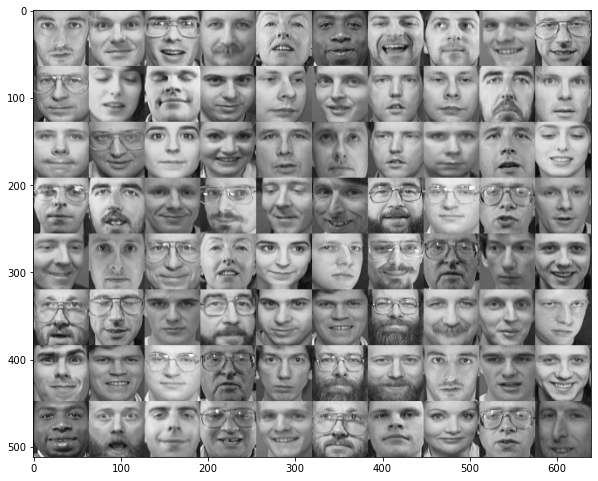

In [29]:
import numpy as np
def show_faces(instances, images_per_row=10):

    images_per_row = min(len(instances),images_per_row)
    nrows = (len(instances) -1)// images_per_row 
    nrows += 1
    row_images =[]
    images = [instance.reshape((64,64)) for instance in instances]
    for row in range(nrows):
        row_image = images[row*images_per_row : (row+1)*images_per_row ]
        row_images.append(np.concatenate(row_image,axis=1))
    
    image = np.concatenate(row_images,axis=0)
    plt.figure(figsize=(10,10))
    plt.imshow(image, cmap="binary_r")
    plt.show()

show_faces(X_validation)

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette = []

for k in range(2,150):
    if k%5 == 0:
        print(f"k= {k}")
    clr = KMeans(n_clusters=k,random_state=42) # The dataset is pre-scaled
    labels = clr.fit_predict(X_train_pca)
    silhouette.append(silhouette_score(X_train_pca,labels))

print(silhouette)

k= 5
k= 10
k= 15
k= 20
k= 25
k= 30
k= 35
k= 40
k= 45
k= 50
k= 55
k= 60
k= 65
k= 70
k= 75
k= 80
k= 85
k= 90
k= 95
k= 100
k= 105
k= 110
k= 115
k= 120
k= 125
k= 130
k= 135
k= 140
k= 145
[0.14910711, 0.1237973, 0.109834604, 0.102782756, 0.09606291, 0.100667216, 0.10737131, 0.09371087, 0.09371101, 0.09232386, 0.09282436, 0.09147628, 0.095686756, 0.102952145, 0.1006519, 0.10574063, 0.104389794, 0.105539285, 0.113177076, 0.102650434, 0.11643899, 0.11504885, 0.115632564, 0.1173309, 0.12633565, 0.11529959, 0.13248716, 0.12406009, 0.12839477, 0.1285602, 0.12712805, 0.1360879, 0.13892749, 0.13860403, 0.14270131, 0.14012796, 0.1378238, 0.13850166, 0.1499323, 0.15299414, 0.15342754, 0.14634605, 0.16107479, 0.155304, 0.15902112, 0.16311435, 0.16131769, 0.16026415, 0.16878885, 0.16739897, 0.17043677, 0.17199382, 0.1764624, 0.1707243, 0.18203712, 0.18094118, 0.18233353, 0.17321773, 0.17478934, 0.17799447, 0.18315932, 0.18817265, 0.19322665, 0.19254708, 0.17914763, 0.19246951, 0.19089188, 0.1856075, 0.

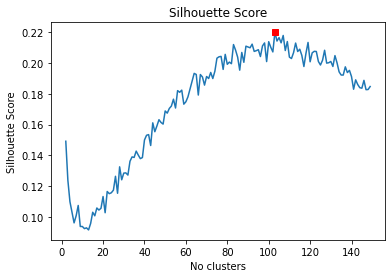

Max silhouette: 0.220 achieved for k=103


In [38]:
plt.plot(range(2,150),silhouette)
plt.title("Silhouette Score")
plt.xlabel("No clusters")
plt.ylabel("Silhouette Score")
best_k = np.argmax(silhouette) +2
max_score = max(silhouette)
plt.plot(best_k, max_score, "rs")


plt.show()
print(f"Max silhouette: {max_score:.3f} achieved for k={best_k}")

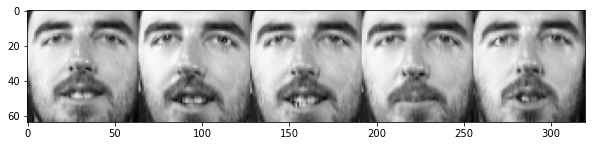

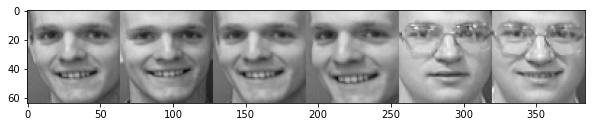

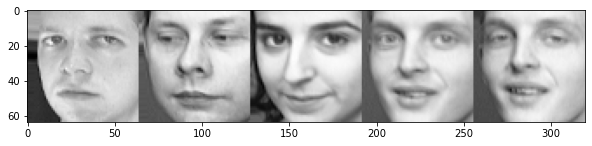

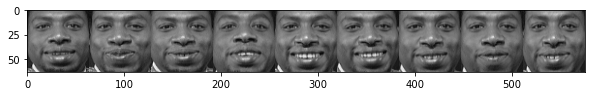

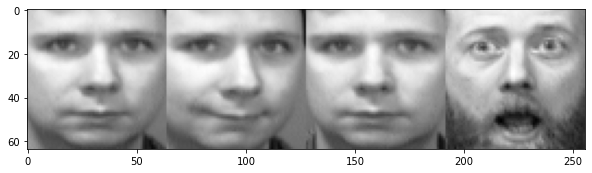

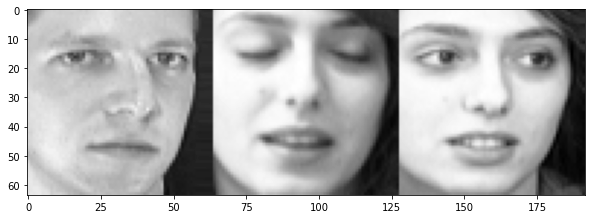

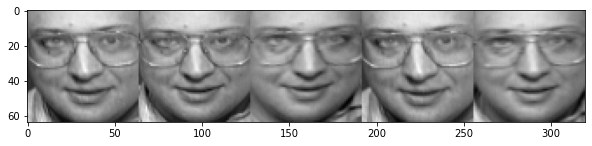

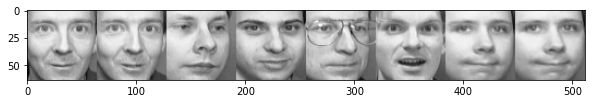

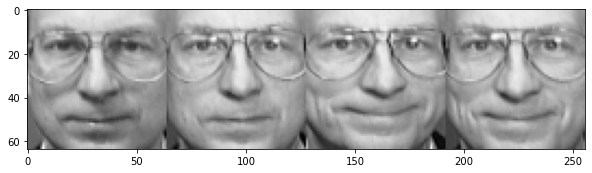

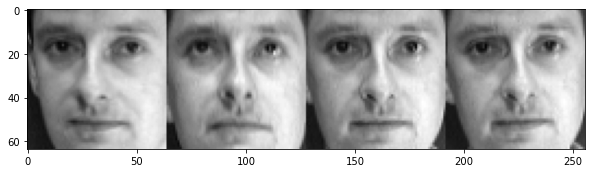

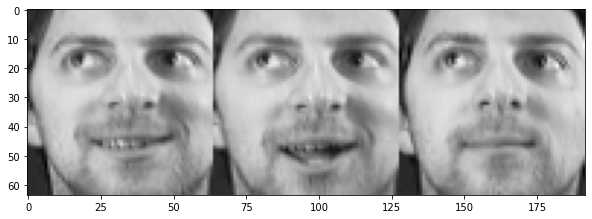

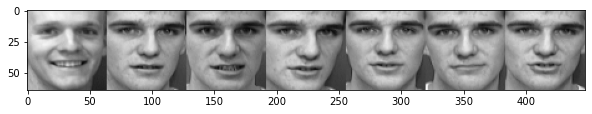

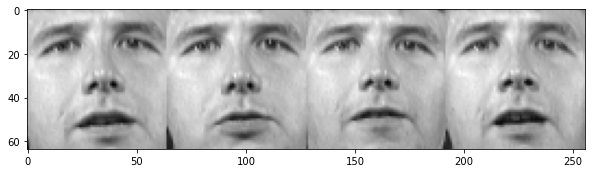

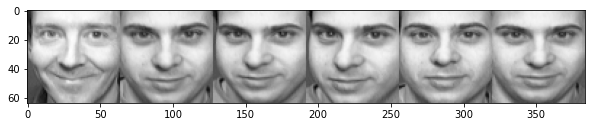

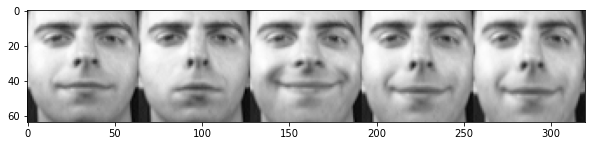

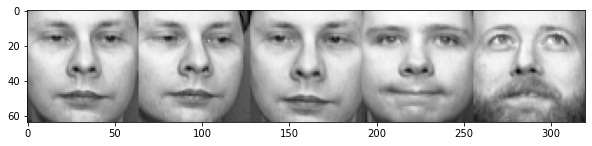

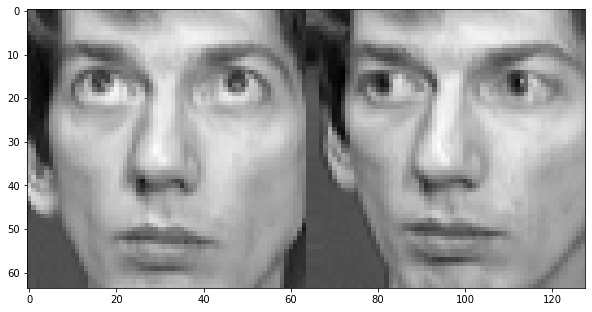

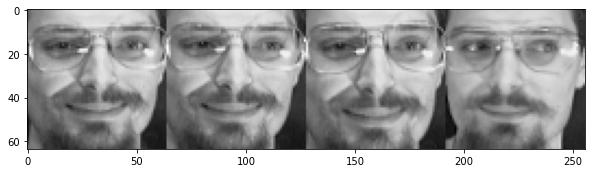

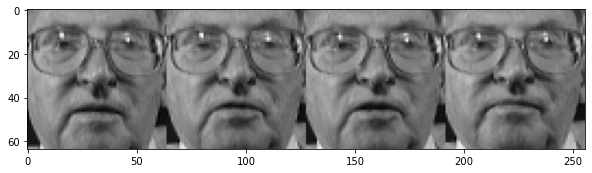

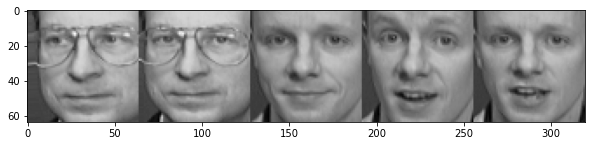

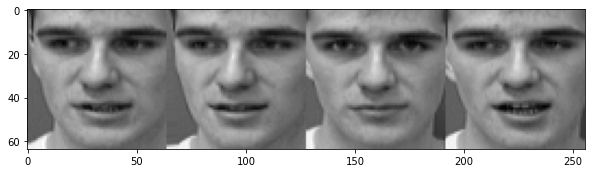

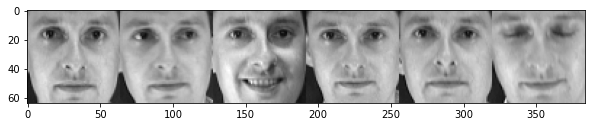

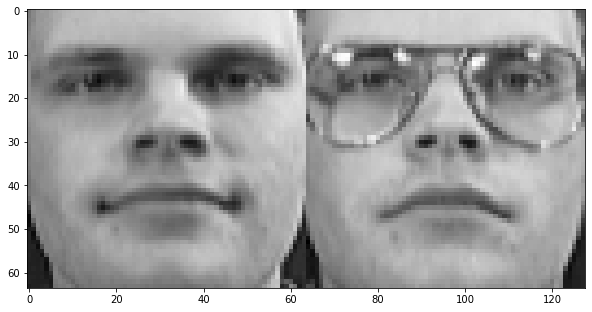

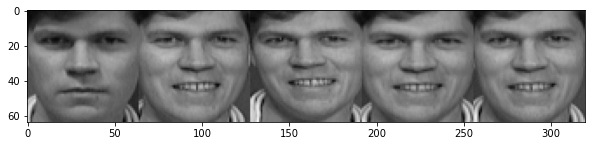

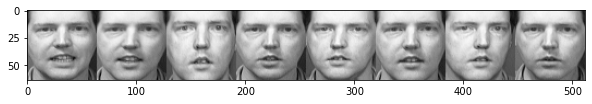

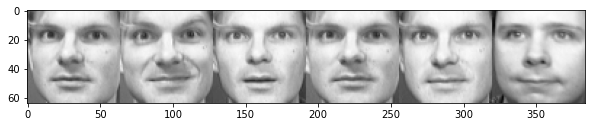

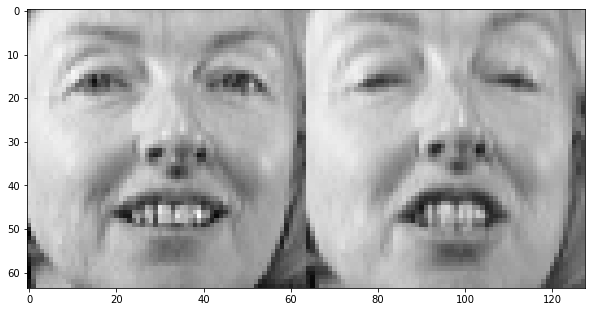

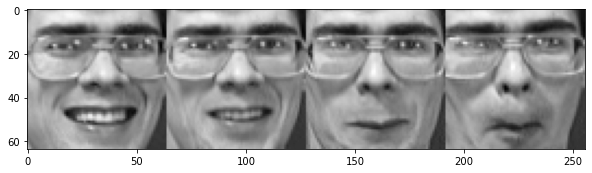

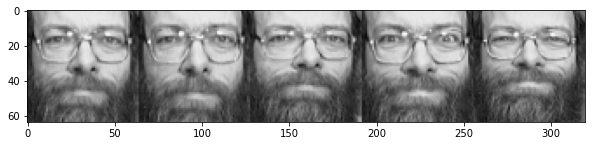

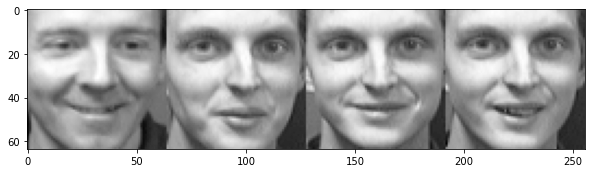

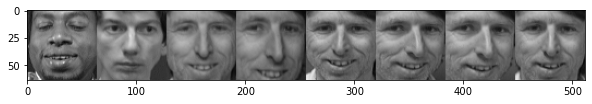

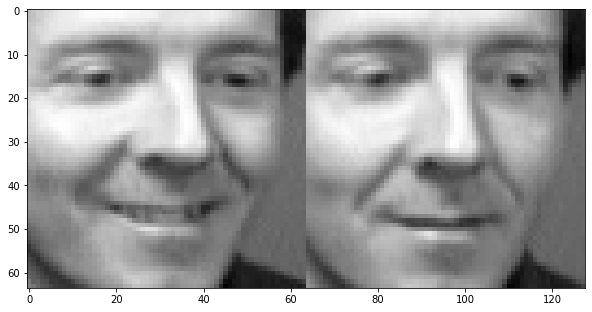

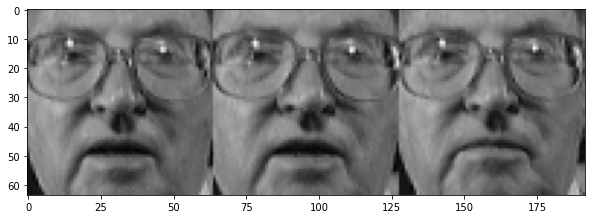

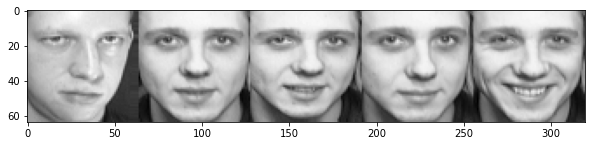

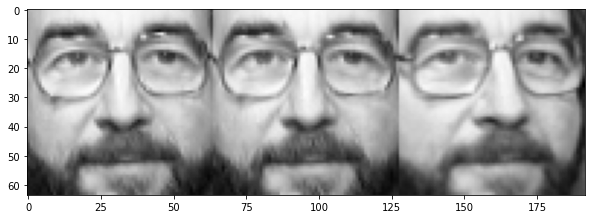

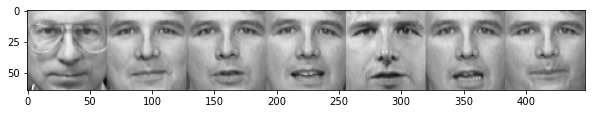

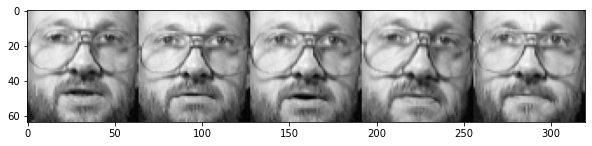

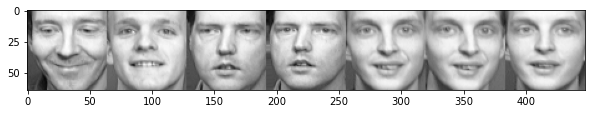

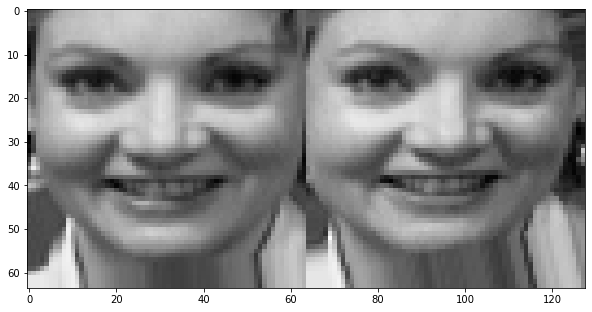

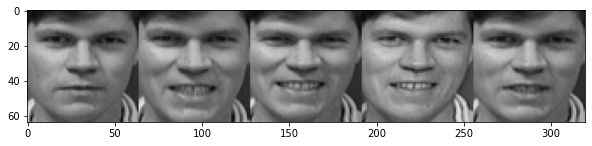

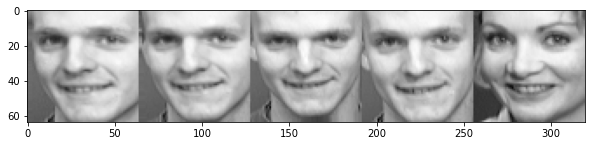

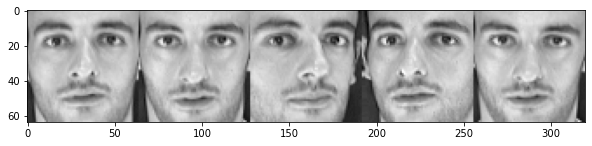

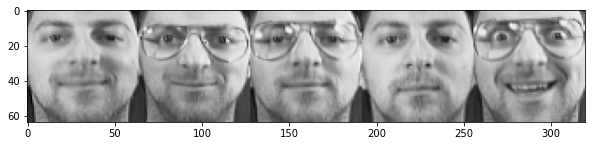

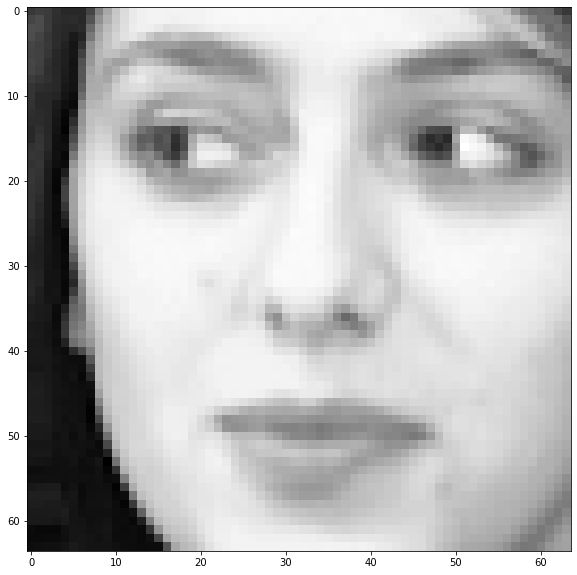

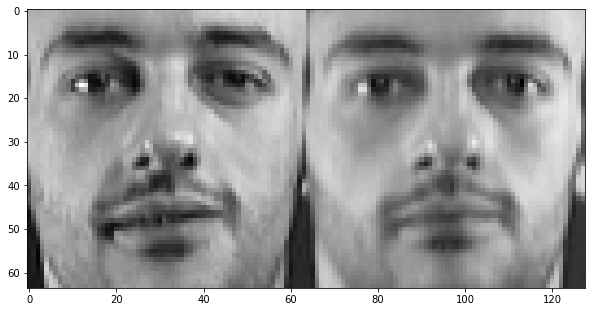

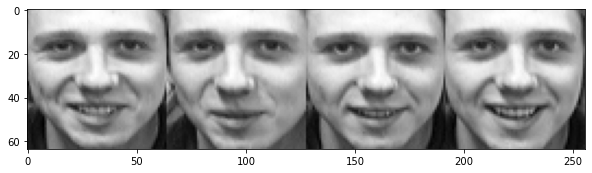

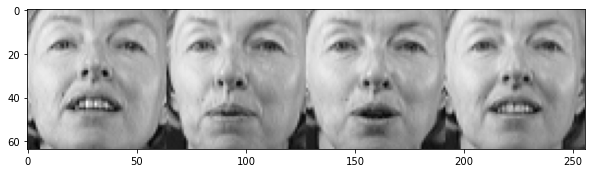

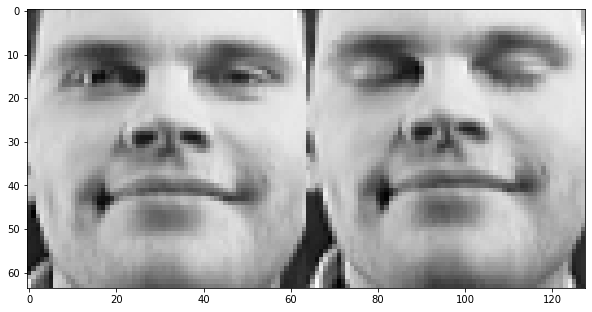

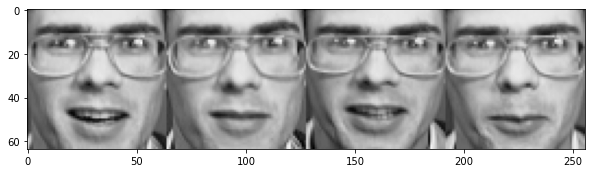

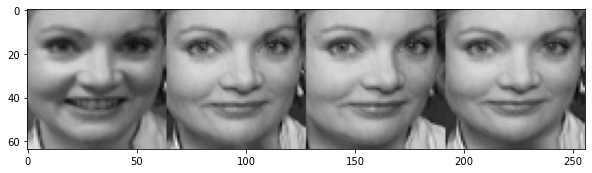

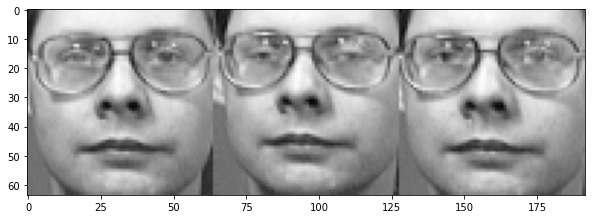

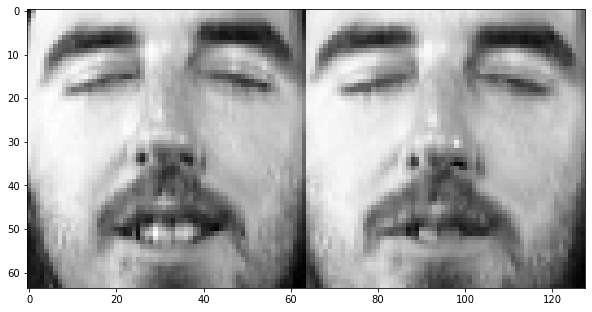

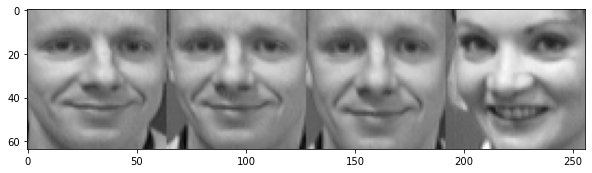

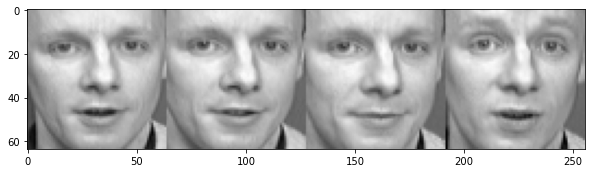

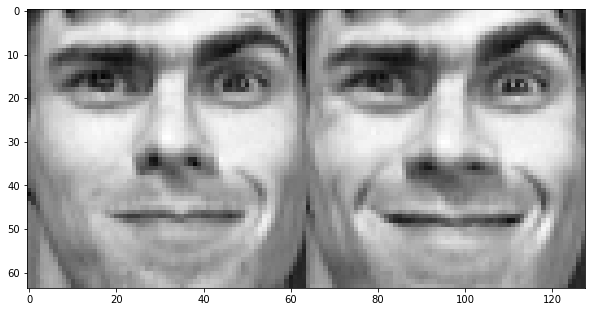

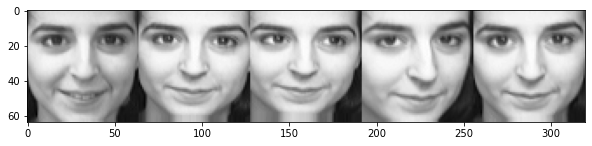

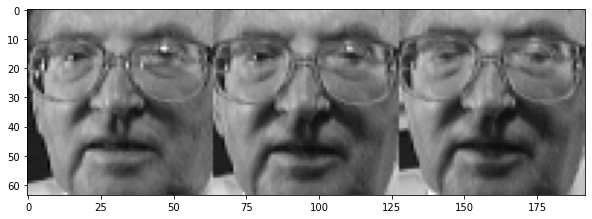

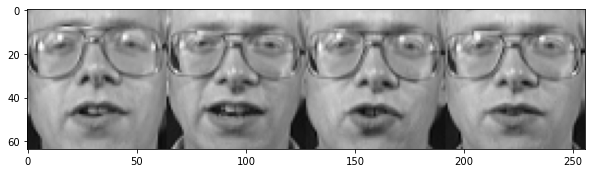

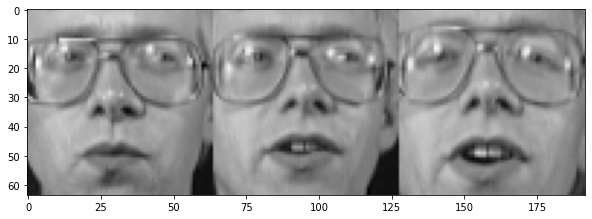

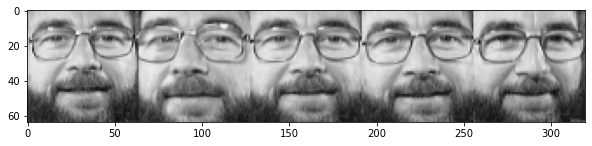

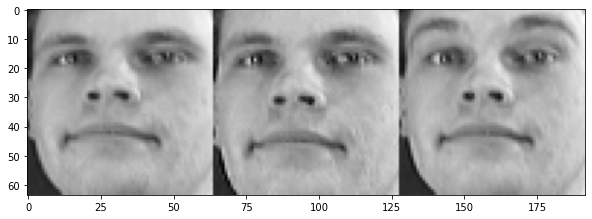

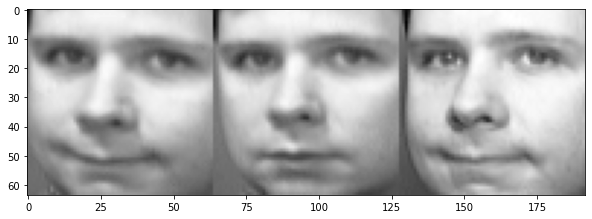

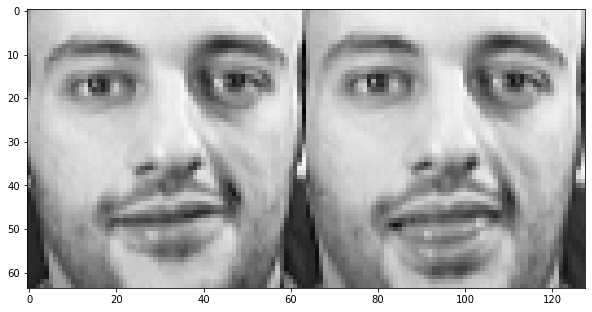

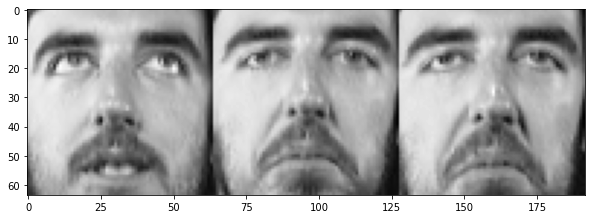

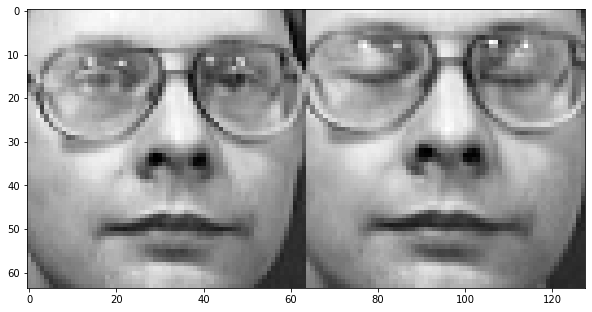

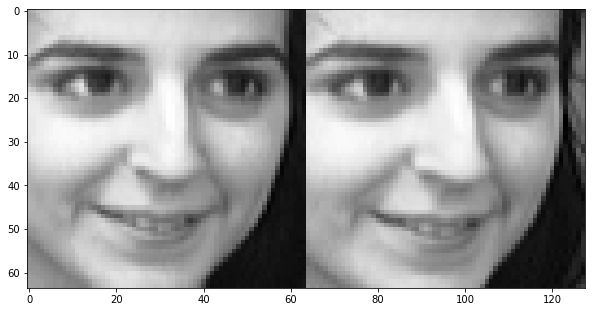

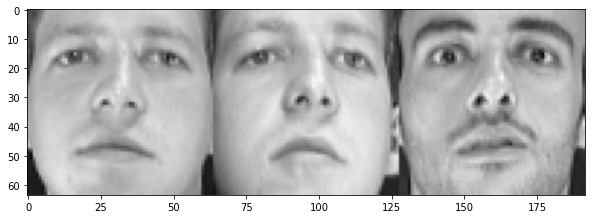

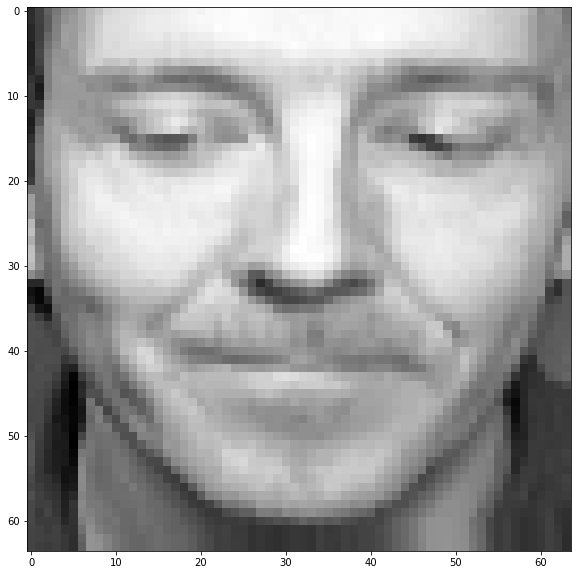

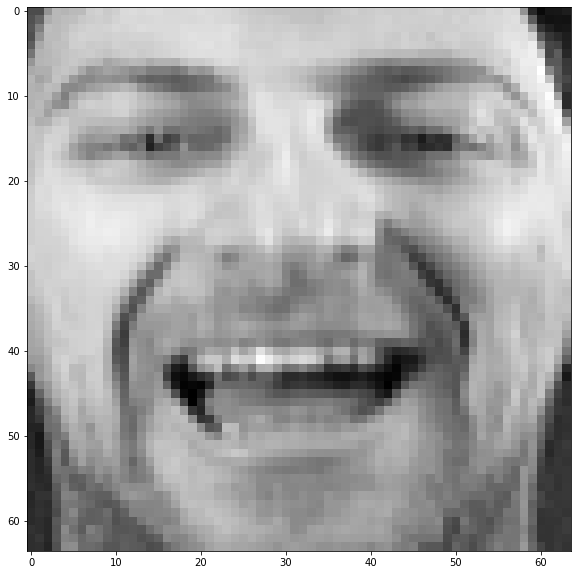

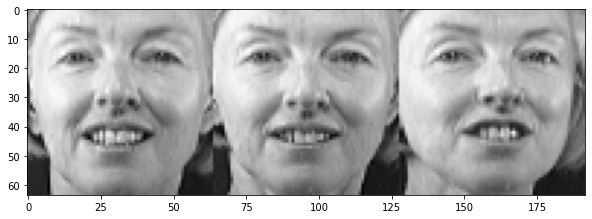

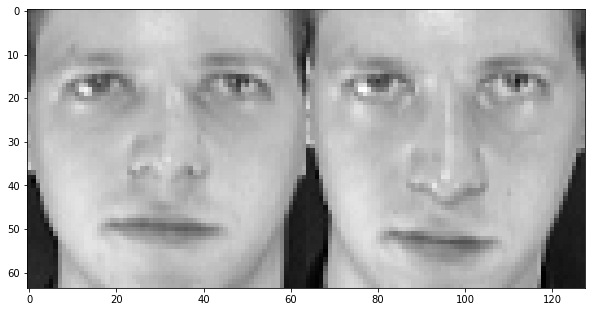

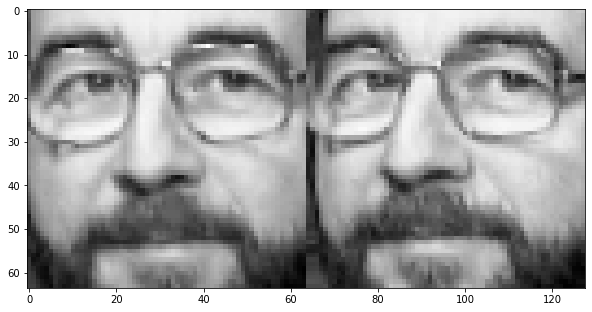

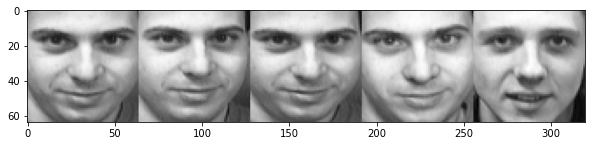

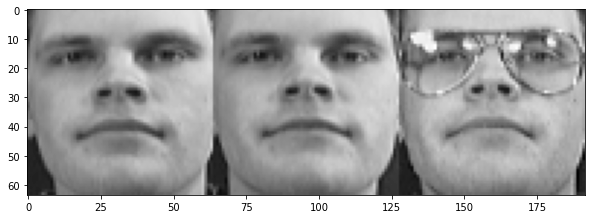

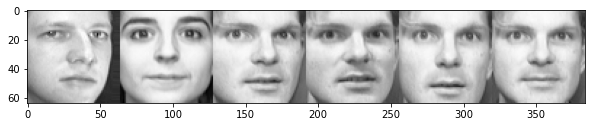

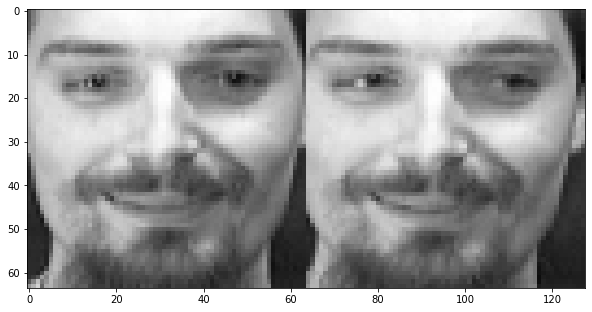

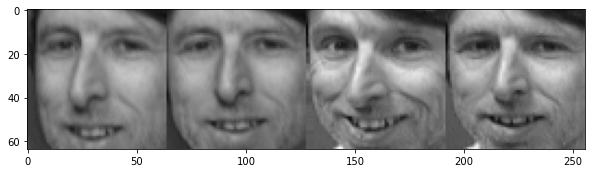

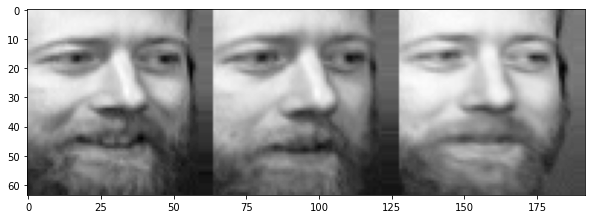

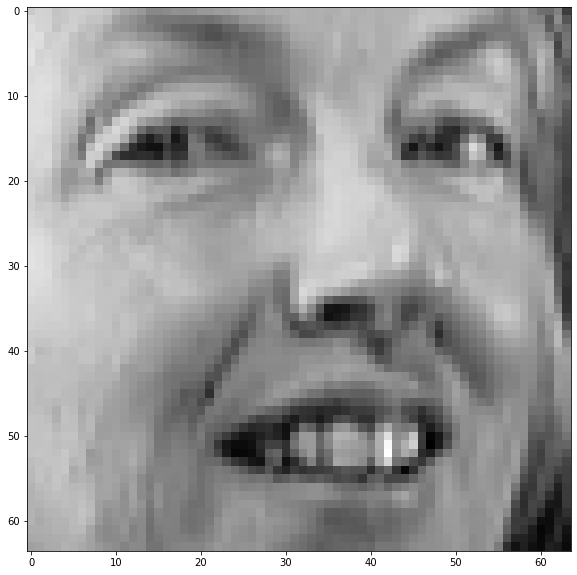

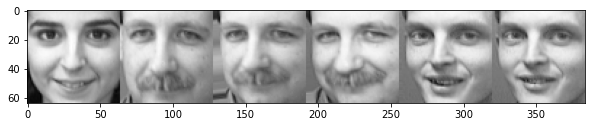

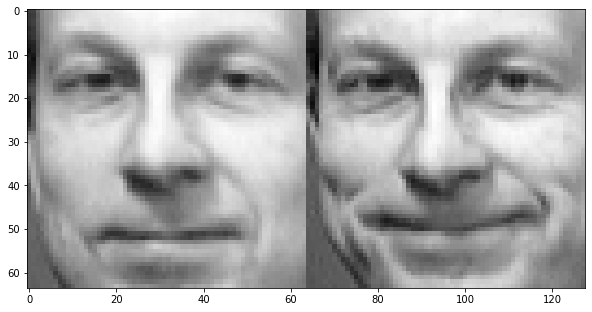

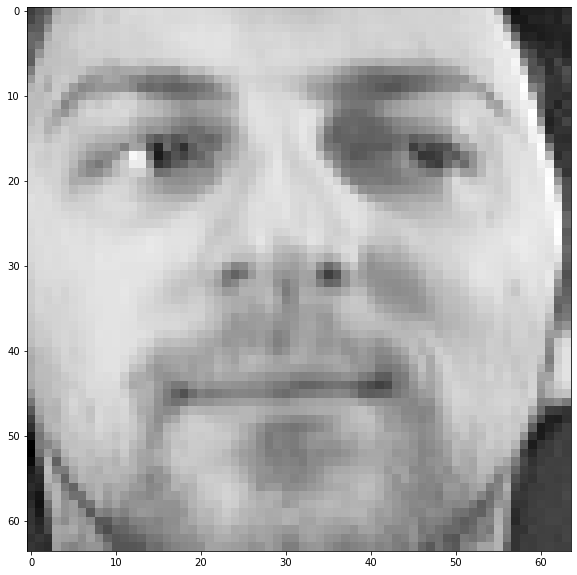

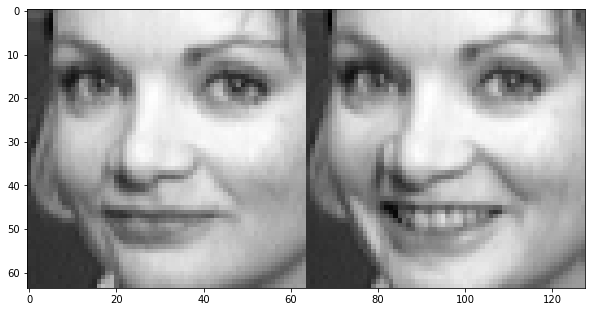

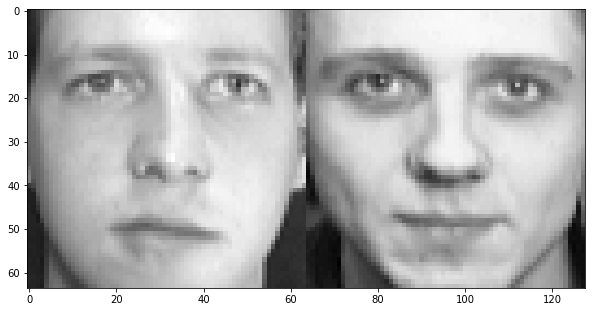

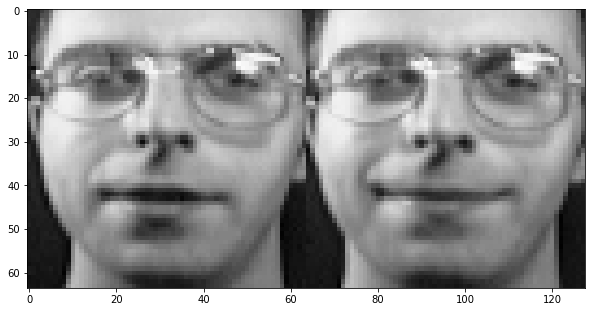

In [47]:
#with 2 clusters
clr = KMeans(n_clusters=best_k,random_state=42) # The dataset is pre-scaled
labels = clr.fit_predict(X)

for k in range(best_k):
    in_cluster = labels == k
    faces = X[in_cluster]
    ls = y[in_cluster]
    show_faces(faces)